In [1]:
import tushare as ts;
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#data = ts.get_hist_data('000559', autype='hfq') #一次性获取全部日k线数据
data = ts.get_h_data('002558', autype='qfq') #一次性获取全部日k线数据

# data = ts.get_h_data('000559' ) #一次性获取全部日k线数据

[Getting data:]####

/Library/Python/2.7/site-packages/tushare/stock/trading.py:447: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort('date', ascending=False)


In [6]:
print data

             open   high  close    low      volume        amount
date                                                            
2017-06-22  43.62  44.97  42.90  42.84   4374878.0  1.993849e+08
2017-06-21  43.17  43.75  43.44  43.07   1938748.0  1.047078e+08
2017-06-20  43.34  44.04  43.38  43.04   3567109.0  1.930474e+08
2017-06-19  44.18  44.56  43.34  43.03   3603532.0  1.956682e+08
2017-06-16  44.63  45.09  44.15  43.75   4279930.0  2.374064e+08
2017-06-15  43.77  44.96  44.15  43.72   4247800.0  2.348847e+08
2017-06-14  43.52  44.90  44.09  43.48   3628592.0  1.998319e+08
2017-06-13  43.20  44.92  44.30  42.99   4561508.0  2.494275e+08
2017-06-12  45.76  45.76  44.14  43.84   7624077.0  4.257180e+08
2017-06-09  44.96  46.07  46.07  42.55  13200112.0  7.419549e+08
2017-06-08  41.58  42.07  41.88  41.36   3448134.0  1.792919e+08
2017-06-07  40.88  42.14  41.87  40.67   5304642.0  2.742935e+08
2017-06-06  41.34  41.34  40.93  40.55   1720021.0  8.751770e+07
2017-06-05  40.86  41.51 

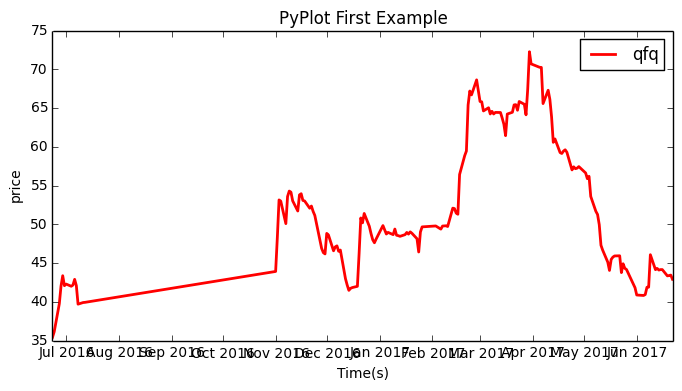

In [7]:
x=np.array(data.index)
y=data['close']
plt.figure(figsize=(8,4))
plt.plot(x,y,label="qfq",color="red",linewidth=2)
plt.xlabel("Time(s)")
plt.ylabel("price")
plt.title("PyPlot First Example")
# plt.ylim(-1.2,1.2)
plt.legend()
plt.show()

In [ ]:
data = ts.get_hist_data('002230') #一次性获取全部日k线数据
#data = ts.get_hist_data('002230') #一次性获取全部日k线数据
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


In [61]:
data.ix

In [62]:
col_names = list(data.columns)
print col_names

['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20', 'turnover']


In [63]:
data_np = np.array(data)

In [64]:
label = data_np[1:,col_names.index('p_change')]
features1 = data_np[:-1, 0:5]
features2 = data_np[:-1, 7:]
features = np.c_[features1, features2]
fnames = col_names[0:5]
fnames.extend(col_names[7:])

In [65]:
label=[round(i,0)  for i in label]

In [66]:
train_label = np.array(label[0:len(label)*3/4])
test_label  = np.array(label[len(label)*3/4:])

train_features = np.array(features[0:len(label)*3/4]) 
test_features  = np.array(features[len(label)*3/4:])

In [67]:
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 100

# Network Parameters
n_input = 1 # MNIST data input (img shape: 28*28)
n_steps = 14 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 11 # MNIST total classes (0-9 digits)



In [71]:
x = tf.placeholder("float32", [None, n_steps, n_input])
# Tensorflow LSTM cell requires 2x n_hidden length (state & cell)
y = tf.placeholder("float32", [None, n_classes])

weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=0.0, state_is_tuple=True)
_state = lstm_cell.zero_state(batch_size,tf.float32)

a1 = tf.transpose(x, [1, 0, 2])
a2 = tf.reshape(a1, [-1, n_input])
a3 = tf.matmul(a2, weights['hidden']) + biases['hidden']
a4 = tf.split(0, n_steps, a3)



outputs, states = tf.nn.rnn(lstm_cell, a4, initial_state = _state)
print 'outputs[-1]'
print outputs[-1]
print '-----------------------'

a5 = tf.matmul(outputs[-1], weights['out']) + biases['out']

ValueError: Variable RNN/BasicLSTMCell/Linear/Matrix already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-56-080008d0f01b>", line 36, in <module>
    outputs, states = tf.nn.rnn(lstm_cell, a4, initial_state = _state)
  File "/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):


In [69]:
x = tf.placeholder("float32", [None, n_steps, n_input])
# Tensorflow LSTM cell requires 2x n_hidden length (state & cell)
y = tf.placeholder("float32", [None, n_classes])

weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=0.0, state_is_tuple=True)
_state = lstm_cell.zero_state(batch_size,tf.float32)

a1 = tf.transpose(x, [1, 0, 2])
a2 = tf.reshape(a1, [-1, n_input])
a3 = tf.matmul(a2, weights['hidden']) + biases['hidden']
a4 = tf.split(0, n_steps, a3)
print '-----------------------'

print 'a1:'
print a1
print '-----------------------'

print 'a2:'
print a2
print '-----------------------'
print 'a3:'
print a3
print '-----------------------'
print 'a4:'
print a4


outputs, states = tf.nn.rnn(lstm_cell, a4, initial_state = _state)
print 'outputs[-1]'
print outputs[-1]
print '-----------------------'

a5 = tf.matmul(outputs[-1], weights['out']) + biases['out']
print 'a5:'
print a5
print '-----------------------'




cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(a5, y))

#AdamOptimizer
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
correct_pred = tf.equal(tf.argmax(a5,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.initialize_all_variables()



sess = tf.Session()
# in Jupyter we use following InteractiveSession
# sess = tf.InteractiveSession()
sess.run(init)
step = 1
# Keep training until reach max iterations
while step * batch_size < training_iters:
#     batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = train_features[(step-1) * batch_size:step * batch_size]
    batch_ys = label_features[(step-1) * batch_size:step * batch_size]
    # Reshape data to get 28 seq of 28 elements
    batch_xs = batch_xs.reshape((batch_size, n_steps, n_input))
    # Fit training using batch data
    sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
    if step % display_step == 0:
        # Calculate batch accuracy
        acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys,})
        # Calculate batch loss
        loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})
        print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) +  ", Training Accuracy= " + "{:.5f}".format(acc)
    step += 1
print "Optimization Finished!"


test_len = batch_size
# test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
# test_label = mnist.test.labels[:test_len]
test_data  = test_features
test_label = test_label
# Evaluate model
correct_pred = tf.equal(tf.argmax(a5,1), tf.argmax(y,1))
print "Testing Accuracy:", sess.run(accuracy, feed_dict={x: test_data, y: test_label})
#https://zhuanlan.zhihu.com/p/23018343?refer=xishi





-----------------------
a1:
Tensor("transpose_3:0", shape=(14, ?, 1), dtype=float32)
-----------------------
a2:
Tensor("Reshape_6:0", shape=(?, 1), dtype=float32)
-----------------------
a3:
Tensor("add_4:0", shape=(?, 128), dtype=float32)
-----------------------
a4:
[<tf.Tensor 'split_3:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:1' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:2' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:3' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:4' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:5' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:6' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:7' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:8' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:9' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:10' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:11' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:12' shape=(?, 128) dtype=float32>, <tf.Tensor 'split_3:13' s

ValueError: Variable RNN/BasicLSTMCell/Linear/Matrix already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-56-080008d0f01b>", line 36, in <module>
    outputs, states = tf.nn.rnn(lstm_cell, a4, initial_state = _state)
  File "/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):


In [32]:
a={"a":1,"b":2}
b={"a":22,"c":3}
a.update(b)
print a

{'a': 22, 'c': 3, 'b': 2}
